In [1]:
# 设置cell宽度
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 警告
import warnings
warnings.filterwarnings('ignore')

# matplotlib
from tqdm import tqdm
from pprint import pprint
from matplotlib import pylab
from seaborn import set_style
set_style("darkgrid")
%matplotlib inline

# matplotlib 中文乱码、正负号乱码
from platform import system
os_name = system()
print(os_name)

from matplotlib import rcParams
rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
if os_name == r"Windows":
    rcParams["font.sans-serif"]=["SimHei"] #设置字体
elif os_name == r"Darwin":
    rcParams['font.family'] = 'PingFang HK'
else:
    pass


# 调整运行根目录
import os
# os.chdir(os.path.abspath(os.path.dirname(os.getcwd())))
# os.chdir(os.path.abspath(os.path.dirname(os.getcwd())))
#os.chdir(os.path.abspath(os.path.dirname(os.getcwd())))
print(os.getcwd()) 

# Dataframe显示格式
from pandas import set_option
set_option('display.max_info_rows',1000)
set_option('display.max_rows',1000)
set_option('display.max_columns',1000)
set_option('display.max_colwidth',1000)
set_option('display.float_format',lambda x : '%.4f' % x)

Windows
D:\github\xueqiu\Date20221228 指数成分股重叠和相关性


In [2]:
from pandas import read_csv, read_excel
from os import getcwd, sep
from matplotlib import pyplot
import re

In [3]:
def get_weight_from_zz(index_symbol: str):
    """
    中证指数

    :param index_symbol:
    :return:
    """
    weight = getcwd() + sep + r"data" + sep + r"{}closeweight.xls".format(index_symbol)
    weight = read_excel(io=weight, dtype=str)
    weight.columns = [''.join(re.findall(re.compile(u'[\u4e00-\u9fa5]'), i)) for i in weight.columns]
    weight["权重"] = weight["权重"].astype(float)
    weight.sort_values("权重", inplace=True, ascending=False)
    weight = weight.set_index("成分券代码")
    weight.index.name = "symbol"
    return weight


def get_weight_from_gz(file_name: str):
    """
    国证指数
    :param file_name:
    :return:
    """
    weight = getcwd() + sep + r"data" + sep + r"{}.xls".format(file_name)
    weight = read_excel(io=weight, dtype=str)
    weight.columns = [''.join(re.findall(re.compile(u'[\u4e00-\u9fa5]'), i)) for i in weight.columns]
    weight["权重"] = weight["权重"].astype(float)
    weight.sort_values("权重", inplace=True, ascending=False)
    weight = weight.set_index("样本代码")
    weight.index.name = "symbol"
    return weight

In [4]:
weight = dict()
weight["中证全指"] = get_weight_from_zz("000985")
weight["上证50"] = get_weight_from_zz("000016")
weight["沪深300"] = get_weight_from_zz("000300")
weight["中证500"] = get_weight_from_zz("000905")
weight["中证1000"] = get_weight_from_zz("000852")
weight["创业板指"] = get_weight_from_gz("399006_cons_202211")
weight["深证100"] = get_weight_from_gz("399330_cons_202211")
weight["国证1000"] = get_weight_from_gz("399311_cons_202211")
weight["国证2000"] = get_weight_from_gz("399303_cons_202211")

In [5]:
index_name = "上证50"

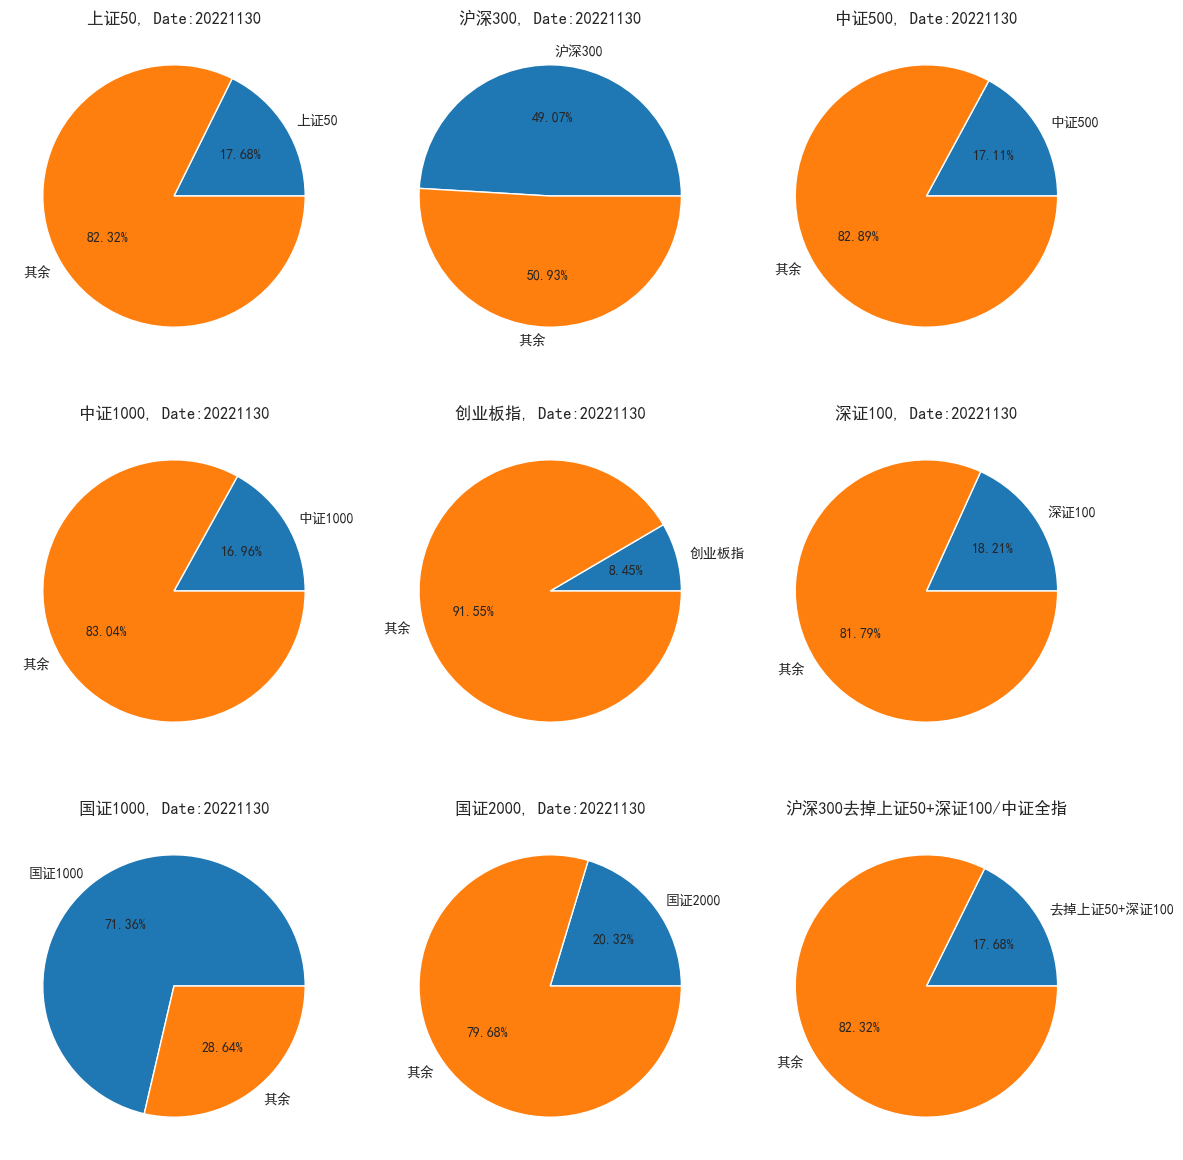

In [6]:
fig = pyplot.figure(figsize=(12, 12))

ax = fig.add_subplot(331)
index_name = "上证50"
w = weight["中证全指"].loc[weight[index_name].index]["权重"].sum() / weight["中证全指"]["权重"].sum()
w = [w, 1-w]
label = [index_name, "其余"]
ax.pie(w,labels=label,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
ax.set_title("{}, Date:{}".format(index_name, weight["中证全指"]["日期"].iloc[0]))

ax = fig.add_subplot(332)
index_name = "沪深300"
w = weight["中证全指"].loc[weight[index_name].index]["权重"].sum() / weight["中证全指"]["权重"].sum()
w = [w, 1-w]
label = [index_name, "其余"]
ax.pie(w,labels=label,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
ax.set_title("{}, Date:{}".format(index_name, weight["中证全指"]["日期"].iloc[0]))

ax = fig.add_subplot(333)
index_name = "中证500"
w = weight["中证全指"].loc[weight[index_name].index]["权重"].sum() / weight["中证全指"]["权重"].sum()
w = [w, 1-w]
label = [index_name, "其余"]
ax.pie(w,labels=label,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
ax.set_title("{}, Date:{}".format(index_name, weight["中证全指"]["日期"].iloc[0]))

ax = fig.add_subplot(334)
index_name = "中证1000"
w = weight["中证全指"].loc[weight[index_name].index]["权重"].sum() / weight["中证全指"]["权重"].sum()
w = [w, 1-w]
label = [index_name, "其余"]
ax.pie(w,labels=label,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
ax.set_title("{}, Date:{}".format(index_name, weight["中证全指"]["日期"].iloc[0]))

ax = fig.add_subplot(335)
index_name = "创业板指"
w = weight["中证全指"].loc[weight[index_name].index]["权重"].sum() / weight["中证全指"]["权重"].sum()
w = [w, 1-w]
label = [index_name, "其余"]
ax.pie(w,labels=label,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
ax.set_title("{}, Date:{}".format(index_name, weight["中证全指"]["日期"].iloc[0]))

ax = fig.add_subplot(336)
index_name = "深证100"
w = weight["中证全指"].loc[weight[index_name].index]["权重"].sum() / weight["中证全指"]["权重"].sum()
w = [w, 1-w]
label = [index_name, "其余"]
ax.pie(w,labels=label,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
ax.set_title("{}, Date:{}".format(index_name, weight["中证全指"]["日期"].iloc[0]))

ax = fig.add_subplot(337)
index_name = "国证1000"
w = weight["中证全指"].loc[weight[index_name].index]["权重"].sum() / weight["中证全指"]["权重"].sum()
w = [w, 1-w]
label = [index_name, "其余"]
ax.pie(w,labels=label,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
ax.set_title("{}, Date:{}".format(index_name, weight["中证全指"]["日期"].iloc[0]))

ax = fig.add_subplot(338)
index_name = "国证2000"
mixed_list = [i for i in weight[index_name].index if i in weight["中证全指"].index.tolist()]
w = weight["中证全指"].loc[mixed_list]["权重"].sum() / weight["中证全指"]["权重"].sum()
w = [w, 1-w]
label = [index_name, "其余"]
ax.pie(w,labels=label,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
ax.set_title("{}, Date:{}".format(index_name, weight["中证全指"]["日期"].iloc[0]))

ax = fig.add_subplot(339)
mixed_list = [i for i in weight["沪深300"].index if i not in weight["上证50"].index.tolist()] 
mixed_list = [i for i in weight["沪深300"].index if i not in mixed_list]
mixed_list = list(set(mixed_list))
w = weight["中证全指"].loc[mixed_list]["权重"].sum() / weight["中证全指"]["权重"].sum()
w = [w, 1-w]
label = ["去掉上证50+深证100", "其余"]
ax.pie(w,labels=label,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
ax.set_title("沪深300去掉{}/中证全指".format("上证50+深证100"))

pyplot.tight_layout()
pyplot.show()
fig.savefig("不同指数占比中证全指.jpg", dpi=300)

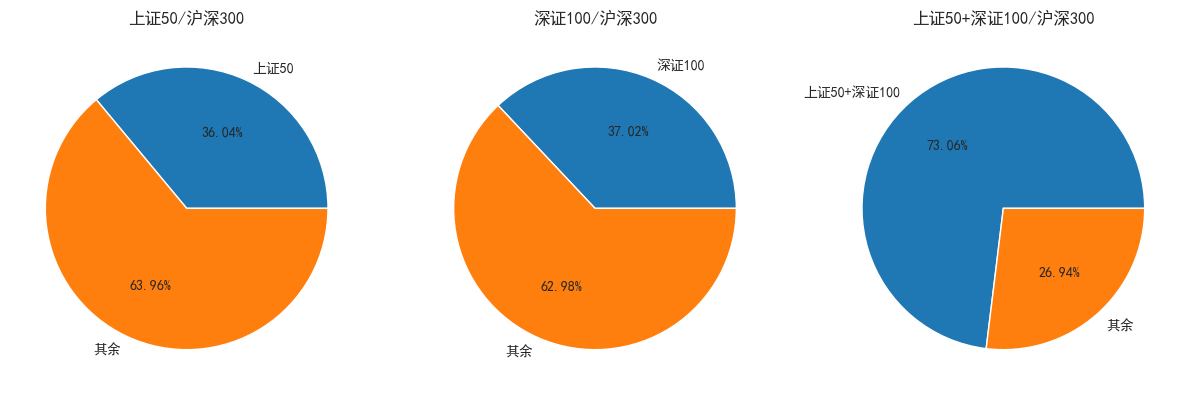

In [7]:
fig = pyplot.figure(figsize=(12, 4))

ax = fig.add_subplot(131)
index_name = "上证50"
w = weight["沪深300"].loc[weight[index_name].index]["权重"].sum() / weight["沪深300"]["权重"].sum()
w = [w, 1-w]
label = [index_name, "其余"]
ax.pie(w,labels=label,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
ax.set_title("{}/沪深300".format(index_name))

ax = fig.add_subplot(132)
index_name = "深证100"
mixed_list = [i for i in weight[index_name].index if i in weight["沪深300"].index.tolist()]
w = weight["沪深300"].loc[mixed_list]["权重"].sum() / weight["沪深300"]["权重"].sum()
w = [w, 1-w]
label = [index_name, "其余"]
ax.pie(w,labels=label,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
ax.set_title("{}/沪深300".format(index_name))

ax = fig.add_subplot(133)
mixed_list = [i for i in weight["深证100"].index if i in weight["沪深300"].index.tolist()] + [i for i in weight["上证50"].index if i in weight["沪深300"].index.tolist()]
mixed_list = list(set(mixed_list))
w = weight["沪深300"].loc[mixed_list]["权重"].sum() / weight["沪深300"]["权重"].sum()
w = [w, 1-w]
label = ["上证50+深证100", "其余"]
ax.pie(w,labels=label,autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
ax.set_title("{}/沪深300".format("上证50+深证100"))

pyplot.tight_layout()
pyplot.show()
fig.savefig("不同指数占比沪深300.jpg", dpi=300)